In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


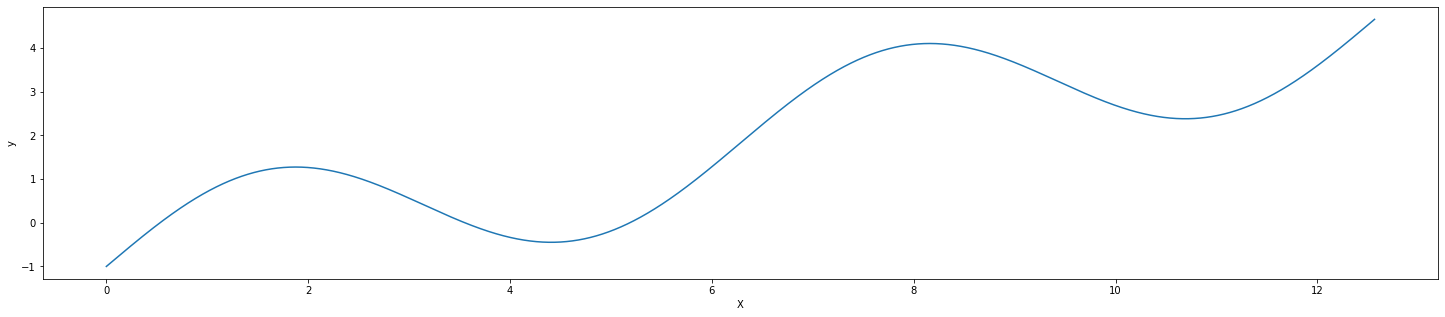

In [ ]:
n = 100000
X = np.deg2rad(np.linspace(0,720,n))
y = 1.5*np.sin(X) + (0.45*X - 1)

fig, axes = plt.subplots(figsize = (25,5))
plot = sns.lineplot(X, y)
plot.set_xlabel('X')
plot.set_ylabel('y')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense # Dense : fully connected

In [ ]:
input_layer = Input(shape=1) # 1 seul neurone car chaque individu sur X est représenté sur une seule colonne
h1 = Dense(units=128, activation='relu')(input_layer) # 128 neurones
output_layer = Dense(units=1, activation='linear')(h1) # neuronne de sortie, linear: f(x)=x ne modifie rien
model = Model(input_layer, output_layer)
model.compile(optimizer="rmsprop", loss="mse", metrics=['mse']) # Pour spécifier le type de backpropagation et la loss function(mse pour la régression)

history =model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)# verbose donne les logs(erreurs)

Epoch 1/50
2000/2000 [==============================] - 3s 1ms/step - loss: 1.3978 - mse: 1.3978 - val_loss: 0.9386 - val_mse: 0.9386
Epoch 2/50
2000/2000 [==============================] - 3s 1ms/step - loss: 0.9387 - mse: 0.9387 - val_loss: 0.8765 - val_mse: 0.8765
Epoch 3/50
2000/2000 [==============================] - 3s 1ms/step - loss: 0.8355 - mse: 0.8355 - val_loss: 0.6803 - val_mse: 0.6803
Epoch 4/50
2000/2000 [==============================] - 3s 1ms/step - loss: 0.6274 - mse: 0.6274 - val_loss: 0.4748 - val_mse: 0.4748
Epoch 5/50
2000/2000 [==============================] - 3s 1ms/step - loss: 0.4092 - mse: 0.4092 - val_loss: 0.2809 - val_mse: 0.2809
Epoch 6/50
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2675 - mse: 0.2675 - val_loss: 0.2014 - val_mse: 0.2014
Epoch 7/50
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2080 - mse: 0.2080 - val_loss: 0.2117 - val_mse: 0.2117
Epoch 8/50
2000/2000 [==============================] - 3s 1ms

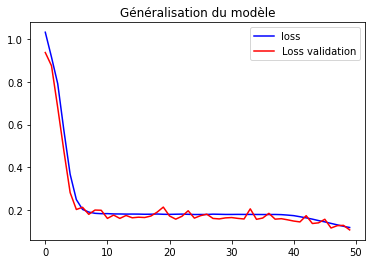

In [ ]:
x_epochs = np.arange(0,50)
plt.plot(x_epochs,history.history['loss'], c='blue', label='loss')# apprentissage cout du train
plt.plot(x_epochs,history.history['val_loss'], c = 'red', label='Loss validation') # cout sur la validation
plt.title("Généralisation du modèle")
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X_test)
history.history['mse']

[1.0338940620422363,
 0.9167118072509766,
 0.7921730279922485,
 0.571416437625885,
 0.36689823865890503,
 0.2478123903274536,
 0.20163282752037048,
 0.18933935463428497,
 0.18344524502754211,
 0.18168020248413086,
 0.18196243047714233,
 0.1804993748664856,
 0.18030524253845215,
 0.1797550618648529,
 0.1798921525478363,
 0.1797228455543518,
 0.17897725105285645,
 0.1792401522397995,
 0.18011203408241272,
 0.17889097332954407,
 0.17843930423259735,
 0.17912045121192932,
 0.17964689433574677,
 0.1787615418434143,
 0.17779532074928284,
 0.17791815102100372,
 0.1779271960258484,
 0.17943468689918518,
 0.1788800209760666,
 0.17814865708351135,
 0.17815566062927246,
 0.1783996820449829,
 0.17817674577236176,
 0.17825669050216675,
 0.1779884248971939,
 0.17776888608932495,
 0.1777597814798355,
 0.17799577116966248,
 0.17722997069358826,
 0.1750946342945099,
 0.1724509596824646,
 0.16739924252033234,
 0.1620551198720932,
 0.15609554946422577,
 0.14923134446144104,
 0.14321757853031158,
 0.13605